In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle

from astropy.io import fits
import astropy.units as u
from astropy.table import Table

#plt.rcParams["font.family"]="Times New Roman"
#plt.rcParams["font.size"]="17"

In [3]:
dist = 2130 #parsecs
pc = dist*(2*np.pi) / (360 * 60 * 60)
s0=(0.9*pc)/2.355
pc,s0

(0.010326531407633116, 0.003946445123936222)

In [4]:
damiani_tab1_file = "Obs/J_A+A_591_A74_table1.dat.fits"
tab = Table.read(damiani_tab1_file)
tab

Id,RAdeg,DEdeg,HaNb,HaRVb,Hasigmab,HaNr,HaRVr,Hasigmar,[NII]Nb,[NII]RVb,[NII]sigmab,[NII]Nr,[NII]RVr,[NII]sigmar,HeINb,HeIRVb,HeIsigmab,HeINr,HeIRVr,HeIsigmar,[SII]1Nb,[SII]1RVb,[SII]1sigmab,[SII]1Nr,[SII]1RVr,[SII]1sigmar,[SII]2Nb,[SII]2RVb,[SII]2sigmab,[SII]2Nr,[SII]2RVr,[SII]2sigmar,Setup
,deg,deg,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,
bytes29,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes10
SKY__10434580-5930497,160.9408,-59.51381,43435.14,-23.61,15.61,58918.77,4.94,13.38,2943.68,-31.66,14.71,11672.97,2.10,10.67,15235.06,-22.16,13.79,18024.73,5.19,10.38,998.76,-32.45,12.98,3398.53,4.20,10.39,727.14,-33.94,12.95,2696.04,3.09,10.02,sky_HR15N
SKY__10445840-5933062,161.2433,-59.55172,18256.59,-31.12,13.93,34321.84,5.23,15.21,1130.41,-24.70,15.34,4429.57,5.90,15.36,5555.79,-30.83,11.55,11833.37,5.01,13.96,1655.72,-4.40,19.00,736.73,9.41,9.97,1304.64,-4.45,19.94,519.97,8.08,9.21,sky_HR15N
SKY__10445040-5935467,161.2100,-59.59631,34377.49,-28.47,13.77,65136.86,-0.09,17.20,2528.38,-22.84,13.49,3541.20,9.64,14.93,11447.99,-28.24,10.67,22875.81,0.41,14.87,1733.36,-20.27,18.14,950.03,14.14,12.06,1352.34,-19.90,18.25,642.85,13.89,11.27,sky_HR15N
SKY__10443390-5934549,161.1413,-59.58192,34307.92,-29.53,14.51,30563.08,-15.04,23.81,10198.94,-25.17,12.26,3538.75,-12.05,25.62,10756.85,-29.39,12.29,11023.40,-15.58,23.19,2687.79,-21.74,12.12,740.18,7.11,32.20,2636.84,-22.17,11.68,582.76,6.44,32.56,sky_HR15N
SKY__10451730-5942205,161.3221,-59.70569,37527.72,-28.25,15.50,22025.68,14.37,14.07,6328.36,-28.63,13.16,2644.65,15.04,12.74,9441.61,-27.95,11.69,7676.87,13.18,13.84,1748.67,-25.49,12.72,836.83,16.73,11.97,1313.25,-26.18,12.99,610.61,16.64,11.96,sky_HR15N
SKY__10451970-5945404,161.3321,-59.76122,24245.06,-21.95,15.87,9017.24,11.42,15.95,4011.71,-17.86,13.23,2122.03,-7.92,27.32,7065.39,-17.61,13.23,1828.86,14.34,8.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,sky_HR15N
SKY__10444430-5943333,161.1846,-59.72592,30519.80,-34.15,14.82,53892.78,7.00,14.64,7207.63,-33.96,12.22,5305.92,9.02,13.03,9951.92,-32.18,14.02,17619.99,7.92,12.14,2213.11,-31.97,11.54,1278.25,10.42,13.44,1662.81,-32.62,11.37,933.80,9.52,13.01,sky_HR15N
SKY__10440670-5947505,161.0279,-59.79736,8057.94,-24.88,16.14,10603.72,10.00,15.99,1587.50,-20.77,13.62,937.43,11.35,15.09,1064.69,-31.31,8.00,4338.92,5.87,17.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,sky_HR15N


In [5]:
df = tab.to_pandas()
df.describe()

,RAdeg,DEdeg,HaNb,HaRVb,Hasigmab,HaNr,HaRVr,Hasigmar,[NII]Nb,[NII]RVb,...,[SII]1sigmab,[SII]1Nr,[SII]1RVr,[SII]1sigmar,[SII]2Nb,[SII]2RVb,[SII]2sigmab,[SII]2Nr,[SII]2RVr,[SII]2sigmar
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,...,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,161.161726,-59.654315,62767.252113,-24.714007,15.885924,53873.122564,7.306363,16.018268,1631.775751,-8.739353,...,9.829619,1484.462829,9.367286,8.744284,1270.717298,-16.464157,9.631455,1203.455046,8.396328,8.680335
std,0.133125,0.080215,54846.830866,8.147913,2.757231,39423.863415,7.179267,5.690883,3522.508469,12.911389,...,6.643375,1633.447299,7.761613,6.028452,1931.147707,12.642477,6.675027,1461.860496,8.268913,6.144453
min,160.768700,-59.891890,0.000000,-51.840000,0.000000,0.000000,-25.070000,0.000000,0.000000,-44.180000,...,0.000000,0.000000,-16.630000,0.000000,0.000000,-39.300000,0.000000,0.000000,-47.760000,0.000000
25%,161.065825,-59.711945,28485.557500,-31.042500,14.320000,24528.595000,3.960000,13.850000,0.000000,-21.497500,...,0.000000,0.000000,0.000000,0.000000,0.000000,-27.327500,0.000000,0.000000,0.000000,0.000000
50%,161.155600,-59.657835,46452.860000,-26.800000,15.170000,45810.270000,7.635000,14.705000,0.000000,0.000000,...,12.010000,1135.875000,10.990000,11.110000,992.800000,-20.370000,11.700000,865.820000,9.485000,10.915000
75%,161.267100,-59.590390,76666.205000,-19.765000,16.707500,76315.320000,12.702500,16.310000,2243.900000,0.000000,...,13.950000,2091.252500,15.367500,12.155000,1706.045000,0.000000,13.857500,1642.482500,14.367500,12.087500
max,161.472400,-59.494310,483044.020000,0.000000,29.720000,372640.170000,32.650000,84.800000,44719.640000,7.920000,...,32.200000,12610.120000,54.680000,44.470000,29844.350000,2.940000,32.070000,13224.150000,61.700000,43.280000


[Text(0.5, 0, 'Velocity')]

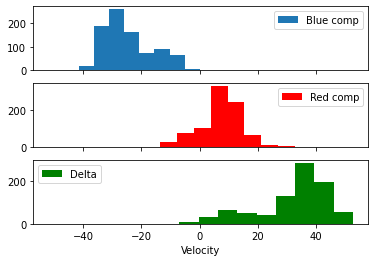

In [6]:
fig, [axb, axr, axd] = plt.subplots(3, 1, sharex=True)
axb.hist(tab["HaRVb"], label='Blue comp')
axr.hist(tab["HaRVr"], color='r', label='Red comp')
axd.hist(tab["HaRVr"] - tab["HaRVb"], color='g', label='Delta')
for ax in axb, axr, axd:
    ax.legend()
axd.set(xlabel='Velocity')

In [7]:
df = df.assign(Ha_dV=df['HaRVr'] - df['HaRVb'])
df = df.assign(Ha_close=(df['Ha_dV'] < 15.0).astype('S5') )
df = df.assign(Ha_rb_ratio=np.log10(df['HaNr']/df['HaNb']))

Blue component

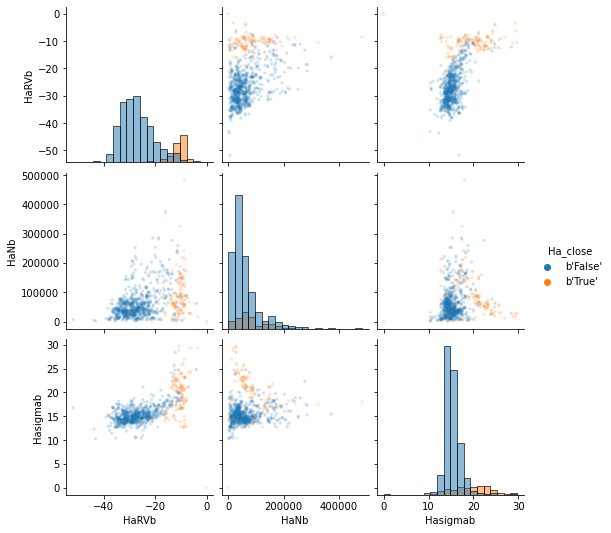

In [8]:
sns.pairplot(df, 
             vars=["HaRVb", "HaNb", "Hasigmab"], 
             diag_kind='hist', hue="Ha_close", 
             plot_kws=dict(alpha=0.2, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


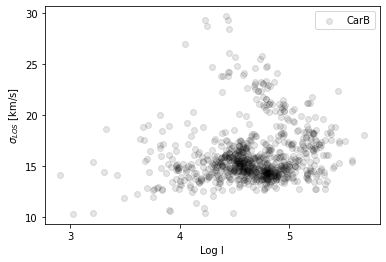

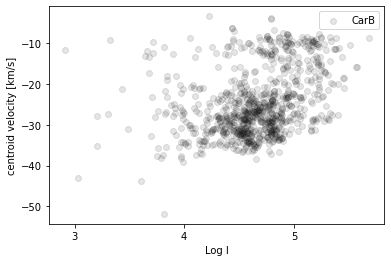

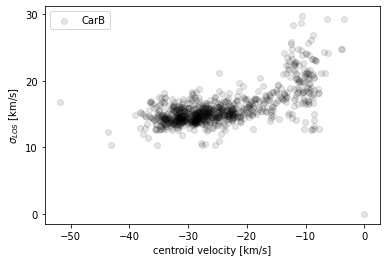

In [9]:
fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNb),df.Hasigmab, alpha=0.1, color='k', label='CarB')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNb),df.HaRVb, alpha=0.1, color='k', label='CarB')

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(df.HaRVb,df.Hasigmab, alpha=0.1, color='k', label='CarB')

ax.set_ylabel('$σ_{LOS}$ [km/s]')
ax.set_xlabel('centroid velocity [km/s]')
plt.legend()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaBlue.pdf', bbox_inches='tight')

Red Component

In [10]:
mask = df['Hasigmar'] > 35.0
df = df[~mask]


In [11]:
df.dropna(inplace=True)

<ipython-input-11-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


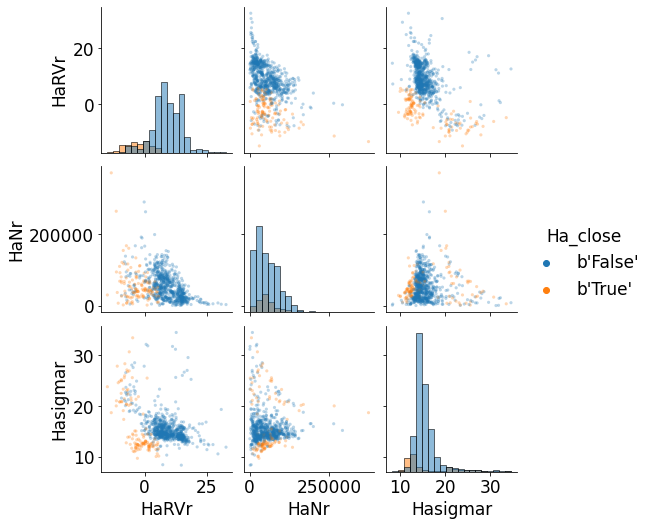

In [12]:
sns.pairplot(df, 
             vars=["HaRVr", "HaNr", "Hasigmar"], 
             diag_kind='hist', hue="Ha_close",
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

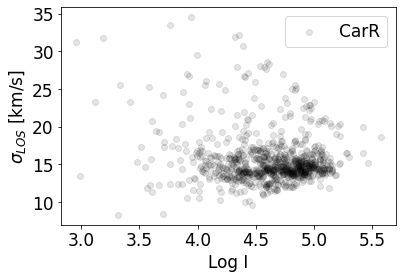

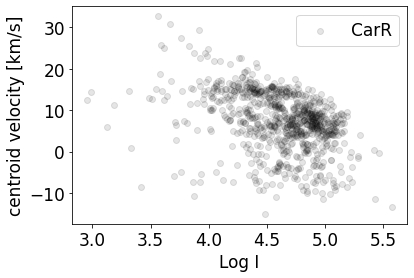

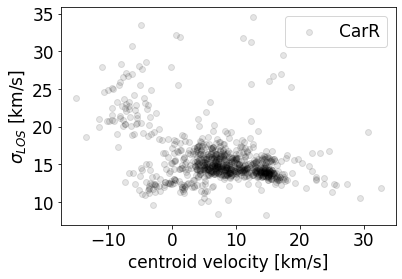

In [13]:
fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNr),df.Hasigmar, alpha=0.1, color='k', label='CarR')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{LOS}$ [km/s]')

plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNr),df.HaRVr, alpha=0.1, color='k', label='CarR')

plt.legend()

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')

fig, ax = plt.subplots()
plt.scatter(df.HaRVr,df.Hasigmar, alpha=0.1, color='k', label='CarR')

ax.set_ylabel('$σ_{LOS}$ [km/s]')
ax.set_xlabel('centroid velocity [km/s]')
plt.legend()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaRed.pdf', bbox_inches='tight')

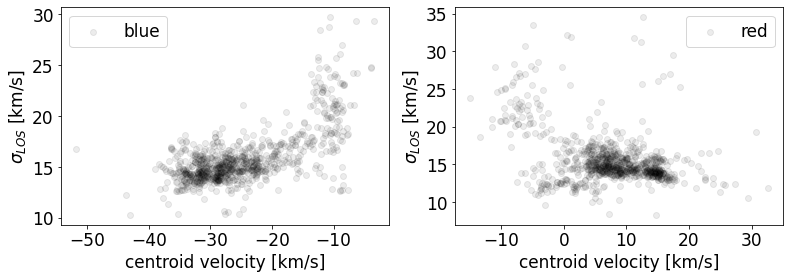

In [14]:
plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.scatter(df.HaRVb,df.Hasigmab, alpha=0.075, color='k', label='blue')
plt.xlabel('centroid velocity [km/s]')
plt.ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

plt.subplot(132)
plt.scatter(df.HaRVr,df.Hasigmar, alpha=0.075, color='k', label='red')
plt.xlabel('centroid velocity [km/s]')
plt.ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

plt.show()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaLOSvsPOS.pdf', bbox_inches='tight')

Combining Components

In [15]:
def combine_moments(f1, v1, s1, f2, v2, s2, return_skew=False):
    """Find combined flux, mean velocity, and sigma for two components 
    with fluxes `f1` and `f2`, velocities `v1` and `v2`, and sigmas `s1` and `s2`. 
    Returns tuple of the combined moments: `f`, `v`, `s`."""
    f = f1 + f2
    v = (v1*f1 + v2*f2)/f
    ss = (s1*s1*f1 + s2*s2*f2)/f
    ss += f1*f2*(v1 - v2)**2 / f**2
    s = np.sqrt(ss)
    if return_skew:
        p1 = f1/f
        p2 = f2/f
        skew = p1*p2*(v1 - v2)*((1 - 2*p1)*(v1 - v2)**2 + 3*(s1**2 - s2**2))
        skew /= (p1*(p2*(v1 - v2)**2 + s1**2 - s2**2) + s2**2)**1.5
#        vmode = np.where(f1 > f2, v1, v2)
#        mskew = (v - vmode)/s
        return f, v, s, skew
    else:
        return f, v, s

In [16]:
fHa, vHa, sHa, gHa = combine_moments(
    df.HaNr, df.HaRVr, df.Hasigmar, 
    df.HaNb, df.HaRVb, df.Hasigmab,
    return_skew=True
)

In [17]:
dfHa = pd.DataFrame(
    {'log_F': np.log10(fHa), 
     'V_mean': vHa, 
     'sigma': sHa, 
     'skew': gHa,
     'R_B': df.Ha_rb_ratio,
     'dV': df.Ha_dV,
     'close': df.Ha_close,
     'RAdeg': df.RAdeg,
     'DEdeg': df.DEdeg,
    }
).dropna()

In [18]:
dfHa.describe()

,log_F,V_mean,sigma,skew,R_B,dV,RAdeg,DEdeg
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,4.980402,-8.830675,22.468922,-0.031035,-0.040272,32.261018,161.162622,-59.654128
std,0.302783,4.229329,2.730988,0.306038,0.436005,11.880264,0.132337,0.080008
min,3.413632,-22.703236,15.856762,-0.802990,-1.652288,-2.440000,160.768700,-59.891890
25%,4.827033,-11.433731,20.525060,-0.248047,-0.272299,28.805000,161.068450,-59.712000
50%,5.021479,-8.695479,22.423762,-0.047386,0.006337,35.580000,161.157600,-59.658080
75%,5.180976,-5.994656,24.173194,0.187720,0.248846,40.410000,161.267100,-59.589670
max,5.706532,2.921228,31.576729,0.857175,1.441905,52.510000,161.472400,-59.494310


Maps

In [19]:
points_of_interest = {
    "eta Car": [161.26517, -59.684425],
    "Tr 14": [160.98911, -59.547698],
    "WR 25": [161.0433, -59.719735],
    "Finger": [161.13133, -59.664035],
}
def mark_points(ax):
    for label, c in points_of_interest.items():
        ax.plot(c[0], c[1], marker='+', markersize='12', color='k')

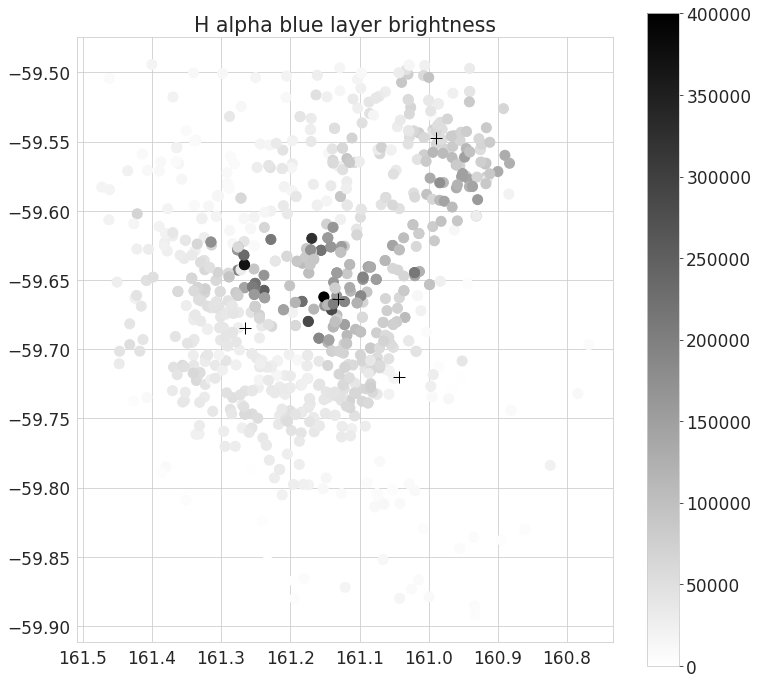

In [20]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(df.RAdeg, df.DEdeg, s=100, c=df.HaNb, cmap='gray_r', vmin=0.0, vmax=4e5)
    fig.colorbar(scat, ax=ax)
    mark_points(ax)
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title('H alpha blue layer brightness')

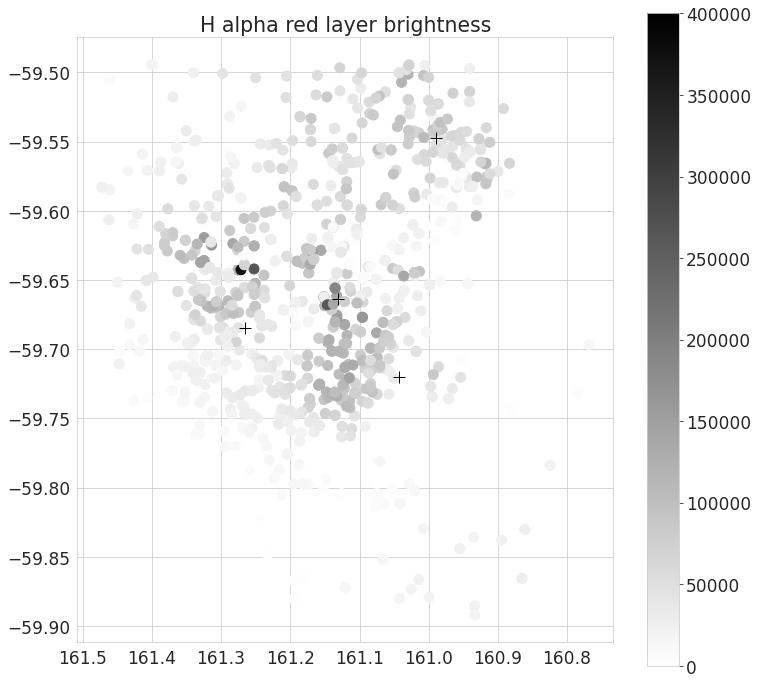

In [21]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(df.RAdeg, df.DEdeg, s=100, c=df.HaNr, cmap='gray_r', vmin=0.0, vmax=4e5)
    fig.colorbar(scat, ax=ax)
    mark_points(ax)
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title('H alpha red layer brightness')

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


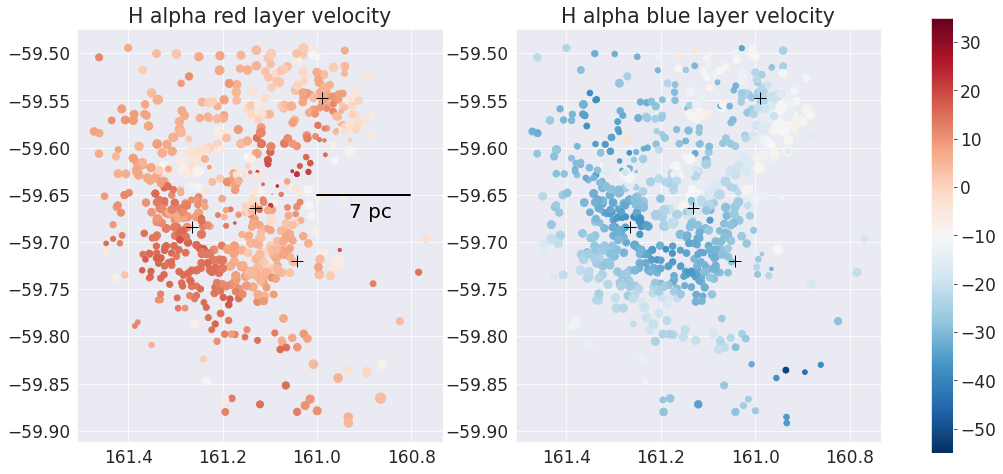

In [22]:
with sns.axes_style("darkgrid"):
    fig, [axr, axb] = plt.subplots(1, 2, figsize=(18, 8))
    scat = axr.scatter(df.RAdeg, df.DEdeg, 
                      s=40*(np.log10(df.HaNr/df.HaNb) + 1.3), 
                      c=df.HaRVr, cmap='RdBu_r',
                      vmin=-55, vmax=35, 
                     )
    
    axr.text(0.53, 0.2, '7 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
    axr.axhline(y=-59.65, xmin=0.655, xmax=0.91, linewidth=2, color = 'k')
    
    scat = axb.scatter(df.RAdeg, df.DEdeg, 
                      s=40*(np.log10(df.HaNb/df.HaNr) + 1.3), 
                      c=df.HaRVb, cmap='RdBu_r',
                      vmin=-55, vmax=35,
                     )
    
#    scat2 = ax.scatter(df.RAdeg, df.DEdeg, 
#                      s=50*(np.log10(df.HaNr) - 3), 
#                      c=df.HaRVr, cmap='RdBu_r',
#                      vmin=-55, vmax=35, marker='+',
#                     )
    fig.colorbar(scat, ax=[axr, axb])
    mark_points(axr)
    mark_points(axb)
    axr.invert_xaxis()
    axr.set_aspect(2.0)
    axb.invert_xaxis()
    axb.set_aspect(2.0)  
    axr.set_title('H alpha red layer velocity')
    axb.set_title('H alpha blue layer velocity')

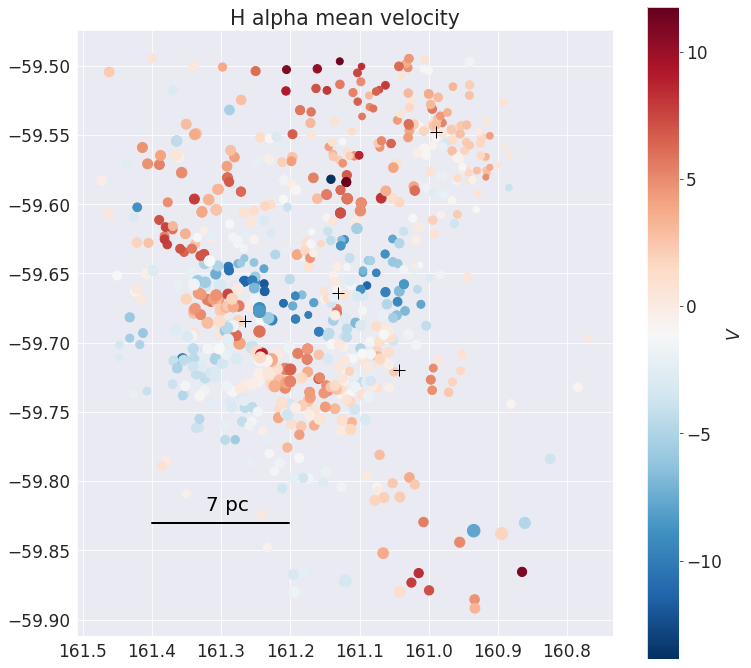

In [23]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(dfHa.RAdeg, dfHa.DEdeg, s=8*(dfHa.sigma - 12), c=dfHa.V_mean-dfHa.V_mean.mean(), cmap='RdBu_r')
    mark_points(ax)
    fig.colorbar(scat, ax=ax).set_label("$V$")
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title("H alpha mean velocity")
    
    ax.text(0.32, 0.2, '7 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    ax.axhline(y=-59.83, xmin=0.14, xmax=0.395, linewidth=2, color = 'k')

Structure Fucntion

Dr. Will Blue

In [24]:
df2 = df[['RAdeg', 'DEdeg', 'HaRVb']].copy()
df2.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'HaRVb' : 'RV'}, inplace = True)
#df2.describe()

Red Dr. Will

In [25]:
df3 = df[['RAdeg', 'DEdeg', 'HaRVr']].copy()
df3.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'HaRVr' : 'RV'}, inplace = True)
#df3.describe()

Combined

In [26]:
df4 = dfHa[['RAdeg', 'DEdeg', 'V_mean']].copy()
df4.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'V_mean' : 'RV'}, inplace = True)
#df4

Data to pc

In [27]:
(((df4.X[1]-df4.X[0])**2)-((df4.Y[1]-df4.Y[0])**2))**0.5

0.30011511441446137

In [28]:
df2.X = df2.X*3600*pc
df2.Y = df2.Y*3600*pc

In [29]:
df3.X = df3.X*3600*pc
df3.Y = df3.Y*3600*pc

In [30]:
df4.X = df4.X*3600*pc
df4.Y = df4.Y*3600*pc

In [31]:
(((df4.X[1]-df4.X[0])**2)-((df4.Y[1]-df4.Y[0])**2))**0.5

11.156933357662338

Export archives

List Form

Combined lines = B + R

In [32]:
f = open('VF\\CarC.pkl',"wb")
pickle.dump(df4,f)
f.close()

All Lines = C / R / B

In [33]:
Car = {'CarB' : df2,
       'CarR' : df3,
       'CarC' :df4,
       'pc' : pc,
       's0' : s0
      }
#Car

In [34]:
f = open('VFL\\Car.pkl',"wb")
pickle.dump(Car,f)
f.close()

Matrix Form

In [35]:
#CarB=(df2).pivot(index='Y', columns='X', values='RV')
#CarR=(df3).pivot(index='Y', columns='X', values='RV')
#CarComb=(df4).pivot(index='Y', columns='X', values='RV')

In [36]:
#CarM = {'CarB' : CarB,
#       'CarR' : CarR,
#       'CarComb' : CarComb,
#      }
#CarM

In [37]:
#import pickle
#f = open('VF2\\Car.pkl',"wb")
#pickle.dump(CarM,f)
#f.close()

In [38]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 15.361739873886108 seconds ---
